In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
features = pd.read_csv('./Data/features.csv')
features.head(5)

,Unnamed: 0,CJWR,ES,FW_LFH,Image-name,LF_FH,MEH,PAR,WHR
0,0,1.136545,45.174139,1.227986,img_1293.bmp,0.351452,35.964674,0.020189,1.954599
1,1,1.194400,49.721947,1.200236,img_3398.bmp,0.496433,37.074287,0.020724,1.985043
2,2,1.376229,51.382779,1.566994,img_2851.bmp,0.306596,53.638591,0.018087,2.012835
3,3,1.424883,30.694998,1.614011,img_3493.bmp,0.308357,26.537562,0.032693,2.022035
4,4,1.144129,19.556742,1.428383,img_1914.bmp,0.488959,12.183614,0.043385,2.061823


In [3]:
bmidata = pd.read_csv('./Data/data.csv')
bmidata.head(5)

,Unnamed: 0,bmi,gender,is_training,name
0,0,34.207396,Male,1,img_0.bmp
1,1,26.453720,Male,1,img_1.bmp
2,2,34.967561,Female,1,img_2.bmp
3,3,22.044766,Female,1,img_3.bmp
4,4,37.758789,Female,1,img_4.bmp


In [4]:
features.isna().sum()

Unnamed: 0      0
CJWR          206
ES            206
FW_LFH        206
Image-name      0
LF_FH         206
MEH           206
PAR           206
WHR           206
dtype: int64

In [5]:
features = features.drop(columns='Unnamed: 0')
features.head()

## reordering the columns in features dataset

cols = list(features)

cols.insert(0, cols.pop(cols.index('Image-name')))
cols
features = features.loc[:, cols]
features.head()

,Image-name,CJWR,ES,FW_LFH,LF_FH,MEH,PAR,WHR
0,img_1293.bmp,1.136545,45.174139,1.227986,0.351452,35.964674,0.020189,1.954599
1,img_3398.bmp,1.194400,49.721947,1.200236,0.496433,37.074287,0.020724,1.985043
2,img_2851.bmp,1.376229,51.382779,1.566994,0.306596,53.638591,0.018087,2.012835
3,img_3493.bmp,1.424883,30.694998,1.614011,0.308357,26.537562,0.032693,2.022035
4,img_1914.bmp,1.144129,19.556742,1.428383,0.488959,12.183614,0.043385,2.061823


In [6]:
## reordering column in bmidata dataset
bmidata = bmidata.drop(columns='Unnamed: 0')
features.head()

bmicols = list(bmidata)

bmicols.insert(0, bmicols.pop(bmicols.index('name')))
bmicols
bmidata = bmidata.loc[:, bmicols]
bmidata.head()

,name,bmi,gender,is_training
0,img_0.bmp,34.207396,Male,1
1,img_1.bmp,26.453720,Male,1
2,img_2.bmp,34.967561,Female,1
3,img_3.bmp,22.044766,Female,1
4,img_4.bmp,37.758789,Female,1


In [7]:
bmidata = bmidata.rename(columns={'name': 'Image-name'})

In [8]:
bmidata.head()

,Image-name,bmi,gender,is_training
0,img_0.bmp,34.207396,Male,1
1,img_1.bmp,26.453720,Male,1
2,img_2.bmp,34.967561,Female,1
3,img_3.bmp,22.044766,Female,1
4,img_4.bmp,37.758789,Female,1


In [9]:
fulldataset = pd.merge(features, bmidata, on ='Image-name')
fulldataset.head()

,Image-name,CJWR,ES,FW_LFH,LF_FH,MEH,PAR,WHR,bmi,gender,is_training
0,img_1293.bmp,1.136545,45.174139,1.227986,0.351452,35.964674,0.020189,1.954599,46.512287,Male,1
1,img_3398.bmp,1.194400,49.721947,1.200236,0.496433,37.074287,0.020724,1.985043,30.406574,Female,0
2,img_2851.bmp,1.376229,51.382779,1.566994,0.306596,53.638591,0.018087,2.012835,30.948639,Female,1
3,img_3493.bmp,1.424883,30.694998,1.614011,0.308357,26.537562,0.032693,2.022035,35.870850,Female,0
4,img_1914.bmp,1.144129,19.556742,1.428383,0.488959,12.183614,0.043385,2.061823,33.507600,Male,1


In [20]:
fulldataset = fulldataset.drop(columns = 'is_training')

In [21]:
fulldataset = fulldataset.rename(columns = {'Image-name': 'Name'})

In [22]:
fulldataset.head()

,Name,gender,CJWR,ES,FW_LFH,LF_FH,MEH,PAR,WHR,bmi
0,img_1293.bmp,Male,1.136545,45.174139,1.227986,0.351452,35.964674,0.020189,1.954599,46.512287
1,img_3398.bmp,Female,1.194400,49.721947,1.200236,0.496433,37.074287,0.020724,1.985043,30.406574
2,img_2851.bmp,Female,1.376229,51.382779,1.566994,0.306596,53.638591,0.018087,2.012835,30.948639
3,img_3493.bmp,Female,1.424883,30.694998,1.614011,0.308357,26.537562,0.032693,2.022035,35.870850
4,img_1914.bmp,Male,1.144129,19.556742,1.428383,0.488959,12.183614,0.043385,2.061823,33.507600


In [38]:
fullcols = list(fulldataset)
fullcols
fullcols.insert(1, fullcols.pop(fullcols.index('gender')))
fullcols
fulldataset = fulldataset.loc[:, fullcols]
fulldataset.head()

,Name,gender,CJWR,ES,FW_LFH,LF_FH,MEH,PAR,WHR,bmi
0,img_1293.bmp,Male,1.136545,45.174139,1.227986,0.351452,35.964674,0.020189,1.954599,46.512287
1,img_3398.bmp,Female,1.194400,49.721947,1.200236,0.496433,37.074287,0.020724,1.985043,30.406574
2,img_2851.bmp,Female,1.376229,51.382779,1.566994,0.306596,53.638591,0.018087,2.012835,30.948639
3,img_3493.bmp,Female,1.424883,30.694998,1.614011,0.308357,26.537562,0.032693,2.022035,35.870850
4,img_1914.bmp,Male,1.144129,19.556742,1.428383,0.488959,12.183614,0.043385,2.061823,33.507600


In [39]:
fulldataset.isna().sum()

Name        0
gender      0
CJWR      206
ES        206
FW_LFH    206
LF_FH     206
MEH       206
PAR       206
WHR       206
bmi         0
dtype: int64

In [40]:
corr = fulldatset.corr()
features_list = list(fulldataset.columns[1:10])
features_list

['gender', 'CJWR', 'ES', 'FW_LFH', 'LF_FH', 'MEH', 'PAR', 'WHR', 'bmi']

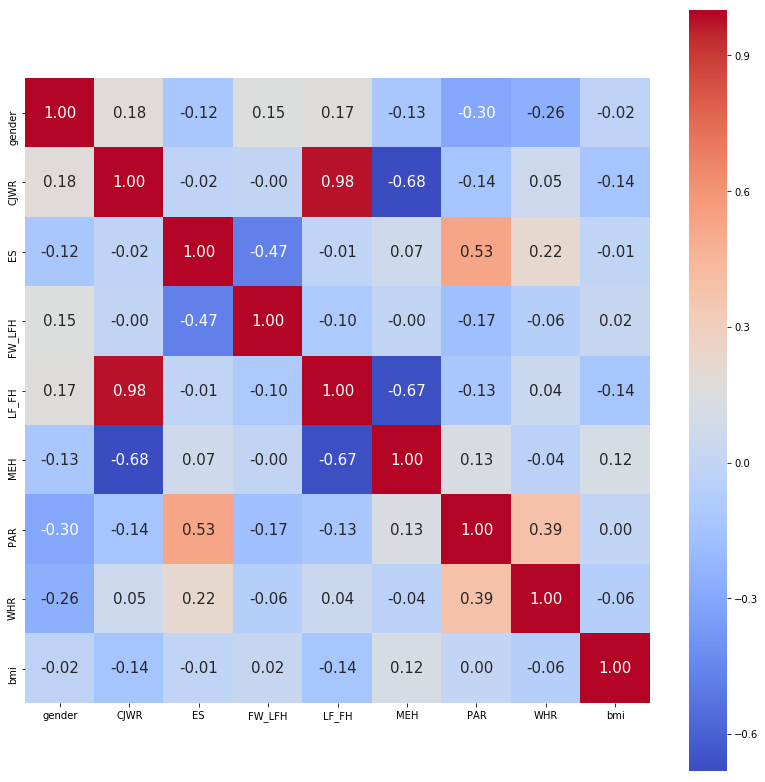

In [41]:
plt.figure(figsize=(14,14))
sns.heatmap(corr, cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 15},
           xticklabels= features_list, yticklabels= features_list,
           cmap= 'coolwarm')

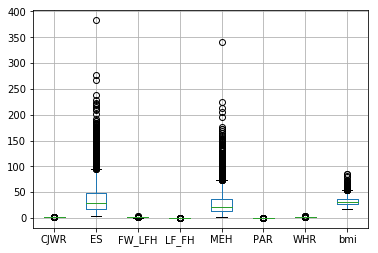

In [43]:
fulldataset.boxplot()

In [44]:
fulldataset.to_csv('./Data/fulldatset.csv')

',Name,gender,CJWR,ES,FW_LFH,LF_FH,MEH,PAR,WHR,bmi\n0,img_1293.bmp,Male,1.1365446776153898,45.17413925462488,1.2279858252619378,0.35145184486253744,35.96467386382997,0.020188693814335787,1.9545989507968928,46.5122873346\n1,img_3398.bmp,Female,1.1944003154455098,49.72194684591,1.2002361823508056,0.4964333303352891,37.07428718148756,0.020724284853507184,1.9850425334267028,30.406574394499998\n2,img_2851.bmp,Female,1.3762294726667763,51.38277908094782,1.5669939540265274,0.3065961469877101,53.638590954572116,0.01808730693272928,2.0128354771835157,30.9486390533\n3,img_3493.bmp,Female,1.4248834043996106,30.69499841892138,1.6140108447822938,0.3083568638438286,26.53756160358656,0.032693464891334116,2.0220353359779484,35.870849609400004\n4,img_1914.bmp,Male,1.1441290003855042,19.556742210595992,1.428382587617546,0.4889586451621821,12.183613696394493,0.043385250758748994,2.061822735745598,33.5075999249\n5,img_3851.bmp,Male,1.2279112443229077,144.48311120855254,1.1992198596421064,0.381689437001935